# Calculate the average mean in time of ssh or any other 2D variable

In [1]:
# Importing all libraries except trackeddy.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
from trackeddy.trackeddy import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *

In [2]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]

In [3]:
count=0
timeavessh=zeros([345-306,shape(eta)[1],shape(eta)[2]])
for tt in range(306,345):
    ncfile=Dataset('/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output'+str(tt)+'/rregionsouthern_ocean_daily_eta_t.nc')
    eta=ncfile.variables['eta_t'][:]*100
    etamean=mean(eta,axis=0)
    timeavessh[count,:,:]=etamean[:,:]
    count=count+1

(931, 3600)


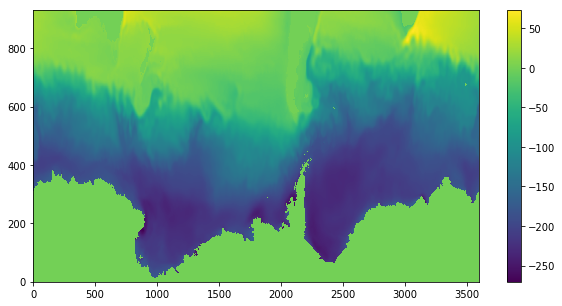

In [4]:
figure(figsize=(10,5))
pcolormesh(mean(timeavessh,axis=0))
colorbar()
print shape(mean(timeavessh,axis=0))

In [5]:
def vargeonc(filename,lat,lon,var,tt,varname,nc_description='',units='',dt='',dim='2D'):
    f = nc4.Dataset(filename,'w', format='NETCDF4')
    f.createDimension('lon', len(lon))
    f.createDimension('lat', len(lat))
    f.createDimension('time', None)
    longitude = f.createVariable('Longitude', 'f4', 'lon')
    latitude = f.createVariable('Latitude', 'f4', 'lat')
    
    time = f.createVariable('Time', 'i4', 'time')
    if dim == '3D':
        f.createDimension('z', len(z))
        levels = f.createVariable('Levels', 'i4', 'z')
        varnc = f.createVariable(varname, 'f4', ('time', 'lat', 'lon', 'z'))
        varnc[tt,:,:,:] = var
        levels[:] = z
        levels.units = 'meters [m]'
    else:
        varnc = f.createVariable(varname, 'f4', ('time', 'lat', 'lon'))
        varnc[tt,:,:] = var
        
    longitude[:] = lon
    latitude[:] = lat
    today = datetime.today()
    time_num = today.toordinal()
    time[tt]=time_num
    
    #Add global attributes
    f.description = nc_description
    f.history = "Created " + today.strftime("%d/%m/%y")
    
    #Add local attributes to variable instances
    longitude.units = 'Longitude [Degrees East]'
    latitude.units = 'Latitude [Degrees North]'
    time.units = 'days since Jan 01, 0001'
    varnc.units = units
    f.close()

In [6]:
filename='/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc'
var = mean(timeavessh,axis=0)
varname='SSH_mean'
units='Centimeters [cm]'
nc_description='SSH mean of the Southern Ocean over 10 years'
dim='2D'
vargeonc(filename,lat,lon,var,0,varname,nc_description=nc_description,units=units,dt='',dim=dim)

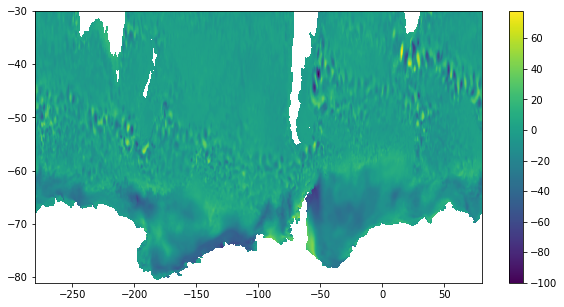

In [7]:
figure(figsize=(10,5))
pcolormesh(lon,lat,eta[0,:,:]-mean(timeavessh,axis=0))
colorbar()

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: SSH mean of the Southern Ocean over 10 years
    history: Created 31/07/17
    dimensions(sizes): lon(3600), lat(931), time(1)
    variables(dimensions): float32 Longitude(lon), float32 Latitude(lat), int32 Time(time), float32 SSH_mean(time,lat,lon)
    groups: 

(931, 3600)


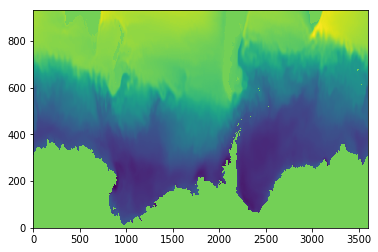

In [8]:
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
print ncfile

ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]
print shape(ssh_mean)
pcolormesh(ssh_mean)

In [ ]:
# Output data path
outputpath='/g/data/v45/jm5970/model_output/mom/mom025_gfdl_nyf_1080/output000/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'ocean_daily.nc')
eta=ncfile.variables['sea_level'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean'][:]
lat=ncfile.variables['yt_ocean'][:]